In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sph6004_assignment1_data.csv')

data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50920 entries, 0 to 50919
Columns: 165 entries, id to weight_admit
dtypes: float64(160), int64(3), object(2)
memory usage: 64.1+ MB


,id,hospital_mortality,aki_stage,admission_age,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,...,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
count,5.092000e+04,50920.000000,50920.000000,50920.000000,50841.000000,50841.000000,50841.000000,50823.000000,50823.000000,50823.000000,...,472.000000,14689.000000,14689.000000,50685.000000,50266.000000,50407.000000,50542.000000,50685.000000,25011.000000,49900.000000
mean,3.498391e+07,0.102298,1.300393,64.942008,69.902996,102.494951,84.266427,93.250232,148.234674,119.102894,...,155.271186,470.911158,582.595412,13.702141,5.167549,3.385066,3.124471,0.205643,169.628199,81.537677
std,2.893873e+06,0.303042,1.088128,17.278264,15.141810,20.481365,15.726366,17.550959,22.737214,16.375046,...,291.000322,997.308493,1461.193067,2.649433,1.665102,2.090396,1.106433,0.404174,10.683969,36.206192
min,3.000015e+07,0.000000,0.000000,18.002527,1.000000,36.000000,28.500000,0.108000,34.000000,32.000000,...,6.000000,31.000000,31.000000,3.000000,1.000000,0.000000,1.000000,0.000000,122.000000,1.000000
25%,3.246663e+07,0.000000,0.000000,54.503884,60.000000,88.000000,73.229167,83.000000,132.000000,107.470588,...,21.000000,195.000000,203.000000,14.000000,5.000000,1.000000,3.000000,0.000000,163.000000,65.900000
50%,3.498649e+07,0.000000,1.000000,66.713334,69.000000,100.000000,82.769231,92.000000,146.000000,116.925926,...,52.000000,262.000000,277.000000,15.000000,6.000000,5.000000,4.000000,0.000000,170.000000,78.400000
75%,3.748413e+07,0.000000,2.000000,78.151289,79.000000,114.000000,94.080000,103.000000,161.000000,129.093074,...,154.250000,396.000000,437.000000,15.000000,6.000000,5.000000,4.000000,0.000000,178.000000,93.000000
max,3.999981e+07,1.000000,3.000000,102.865603,167.000000,280.000000,174.740741,195.000000,357.000000,215.857143,...,2720.000000,22890.000000,63325.000000,15.000000,6.000000,5.000000,4.000000,1.000000,226.000000,5864.000000


In [3]:
#Handle missing data
print(data.isnull().sum())
data = data.dropna(axis=1, thresh=int(0.7 * len(data)))  # Drop columns with more than 30% missing values
data.describe()
print(data.info())


id                        0
hospital_mortality        0
aki_stage                 0
gender                    0
admission_age             0
                      ...  
gcs_verbal              513
gcs_eyes                378
gcs_unable              235
height                25909
weight_admit           1020
Length: 165, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50920 entries, 0 to 50919
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50920 non-null  int64  
 1   hospital_mortality      50920 non-null  int64  
 2   aki_stage               50920 non-null  int64  
 3   gender                  50920 non-null  object 
 4   admission_age           50920 non-null  float64
 5   race                    50920 non-null  object 
 6   heart_rate_min          50841 non-null  float64
 7   heart_rate_max          50841 non-null  float64
 8   heart_rate_mean       

In [4]:
data['gender'].replace({'M': 0, 'F': 1}, inplace=True)

<ipython-input-4-32adbf261734>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].replace({'M': 0, 'F': 1}, inplace=True)
<ipython-input-4-32adbf261734>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'].replace({'M': 0, 'F': 1}, inplace=True)


In [5]:
X = data.drop(['aki_stage', 'id', 'hospital_mortality'], axis=1)

# Convert aki_stage to binary (0 = No AKI, 1 = AKI)
y = data['aki_stage'].apply(lambda x: 1 if x > 0 else 0)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50920 entries, 0 to 50919
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  50920 non-null  int64  
 1   admission_age           50920 non-null  float64
 2   race                    50920 non-null  object 
 3   heart_rate_min          50841 non-null  float64
 4   heart_rate_max          50841 non-null  float64
 5   heart_rate_mean         50841 non-null  float64
 6   sbp_min                 50823 non-null  float64
 7   sbp_max                 50823 non-null  float64
 8   sbp_mean                50823 non-null  float64
 9   dbp_min                 50823 non-null  float64
 10  dbp_max                 50823 non-null  float64
 11  dbp_mean                50823 non-null  float64
 12  mbp_min                 50805 non-null  float64
 13  mbp_max                 50805 non-null  float64
 14  mbp_mean                50805 non-null

In [6]:
race_mapping = {
    'WHITE': 'WHITE',
    'WHITE - OTHER EUROPEAN': 'WHITE',
    'WHITE - RUSSIAN': 'WHITE',
    'WHITE - EASTERN EUROPEAN': 'WHITE',
    'WHITE - BRAZILIAN': 'WHITE',

    'BLACK/AFRICAN AMERICAN': 'BLACK',
    'BLACK/AFRICAN': 'BLACK',
    'BLACK/CAPE VERDEAN': 'BLACK',
    'BLACK/CARIBBEAN ISLAND': 'BLACK',

    'ASIAN': 'ASIAN',
    'ASIAN - CHINESE': 'ASIAN',
    'ASIAN - SOUTH EAST ASIAN': 'ASIAN',
    'ASIAN - ASIAN INDIAN': 'ASIAN',
    'ASIAN - KOREAN': 'ASIAN',

    'HISPANIC OR LATINO': 'HISPANIC_LATINO',
    'HISPANIC/LATINO - PUERTO RICAN': 'HISPANIC_LATINO',
    'HISPANIC/LATINO - DOMINICAN': 'HISPANIC_LATINO',
    'HISPANIC/LATINO - GUATEMALAN': 'HISPANIC_LATINO',
    'HISPANIC/LATINO - SALVADORAN': 'HISPANIC_LATINO',
    'HISPANIC/LATINO - MEXICAN': 'HISPANIC_LATINO',
    'HISPANIC/LATINO - CUBAN': 'HISPANIC_LATINO',
    'HISPANIC/LATINO - COLUMBIAN': 'HISPANIC_LATINO',
    'HISPANIC/LATINO - CENTRAL AMERICAN': 'HISPANIC_LATINO',
    'HISPANIC/LATINO - HONDURAN': 'HISPANIC_LATINO',

    'AMERICAN INDIAN/ALASKA NATIVE': 'AMERICAN_INDIAN',

    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'PACIFIC_ISLANDER',

    'OTHER': 'OTHER',
    'PORTUGUESE': 'OTHER',
    'SOUTH AMERICAN': 'OTHER',
    'MULTIPLE RACE/ETHNICITY': 'OTHER',

    'UNKNOWN': 'UNKNOWN_DECLINED',
    'UNABLE TO OBTAIN': 'UNKNOWN_DECLINED',
    'PATIENT DECLINED TO ANSWER': 'UNKNOWN_DECLINED'
}

#Apply mapping
data['raced'] = data['race'].map(race_mapping)

categorical_cols = ['race']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(X_encoded)

print("Final dataset shape:", X_encoded.shape)




       gender  admission_age  heart_rate_min  heart_rate_max  heart_rate_mean  \
0           1      52.559969            91.0           105.0        96.500000   
1           1      76.486231            68.0            80.0        73.636364   
2           1      55.881486            78.0           106.0        93.200000   
3           1      46.275517            55.0            91.0        79.480000   
4           1      77.018296            38.0            80.0        71.392857   
...       ...            ...             ...             ...              ...   
50915       0      43.884161            76.0           110.0        87.758621   
50916       0      82.773493            63.0            96.0        71.000000   
50917       1      48.022487            93.0           109.0       100.423077   
50918       0      58.694264            71.0           100.0        84.666667   
50919       1      57.837531            76.0           107.0        91.461538   

       sbp_min  sbp_max    

In [7]:
X_encoded = X_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_encoded.info()


<ipython-input-7-53ed3c9de0c6>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_encoded = X_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50920 entries, 0 to 50919
Data columns (total 96 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   gender                                          50920 non-null  int64  
 1   admission_age                                   50920 non-null  float64
 2   heart_rate_min                                  50841 non-null  float64
 3   heart_rate_max                                  50841 non-null  float64
 4   heart_rate_mean                                 50841 non-null  float64
 5   sbp_min                                         50823 non-null  float64
 6   sbp_max                                         50823 non-null  float64
 7   sbp_mean                                        50823 non-null  float64
 8   dbp_min                                         50823 non-null  float64
 9   dbp_max                                

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# using the default BayesianRidge estimator
imputer = IterativeImputer(random_state=42, max_iter=10, tol=1e-3, initial_strategy='mean')

# Apply MICE to impute missing values in the feature set X
X_imputed = imputer.fit_transform(X_encoded)
X_imputed = pd.DataFrame(X_imputed, columns=X_encoded.columns)
print(X_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50920 entries, 0 to 50919
Data columns (total 96 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   gender                                          50920 non-null  float64
 1   admission_age                                   50920 non-null  float64
 2   heart_rate_min                                  50920 non-null  float64
 3   heart_rate_max                                  50920 non-null  float64
 4   heart_rate_mean                                 50920 non-null  float64
 5   sbp_min                                         50920 non-null  float64
 6   sbp_max                                         50920 non-null  float64
 7   sbp_mean                                        50920 non-null  float64
 8   dbp_min                                         50920 non-null  float64
 9   dbp_max                                

Dropping highly correlated features: ['mbp_mean', 'hemoglobin_lab_min', 'hemoglobin_lab_max', 'platelets_max', 'bun_max', 'creatinine_max', 'pt_min', 'pt_max']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50920 entries, 0 to 50919
Data columns (total 88 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   admission_age                                   50920 non-null  float64
 1   heart_rate_min                                  50920 non-null  float64
 2   heart_rate_max                                  50920 non-null  float64
 3   heart_rate_mean                                 50920 non-null  float64
 4   sbp_min                                         50920 non-null  float64
 5   sbp_max                                         50920 non-null  float64
 6   sbp_mean                                        50920 non-null  float64
 7   dbp_min                          

In [9]:
# standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_imputed_scaled = scaler.fit_transform(X_imputed)
X_imputed_scaled = pd.DataFrame(X_imputed_scaled, columns=X_imputed.columns)
print(X_imputed_scaled.describe())


             gender  admission_age  heart_rate_min  heart_rate_max  \
count  5.092000e+04   5.092000e+04    5.092000e+04    5.092000e+04   
mean   7.674755e-18   5.334303e-16   -7.331484e-16   -6.917745e-16   
std    1.000010e+00   1.000010e+00    1.000010e+00    1.000010e+00   
min   -8.890647e-01  -2.716705e+00   -4.554101e+00   -3.249132e+00   
25%   -8.890647e-01  -6.041247e-01   -6.545796e-01   -7.082619e-01   
50%   -8.890647e-01   1.025186e-01   -5.973732e-02   -1.219073e-01   
75%    1.124778e+00   7.645103e-01    6.011986e-01    5.621732e-01   
max    1.124778e+00   2.194895e+00    6.417434e+00    8.673412e+00   

       heart_rate_mean       sbp_min       sbp_max      sbp_mean  \
count     5.092000e+04  5.092000e+04  5.092000e+04  5.092000e+04   
mean      6.740877e-16 -5.478379e-16 -8.866435e-16 -2.301729e-16   
std       1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min      -3.548848e+00 -5.311347e+00 -5.028371e+00 -5.323690e+00   
25%      -7.017359e-01 -5.845

Dropping highly correlated features: ['mbp_mean', 'hemoglobin_lab_min', 'hemoglobin_lab_max', 'platelets_max', 'bun_max', 'creatinine_max', 'pt_min', 'pt_max']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50920 entries, 0 to 50919
Data columns (total 88 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   gender                                          50920 non-null  float64
 1   admission_age                                   50920 non-null  float64
 2   heart_rate_min                                  50920 non-null  float64
 3   heart_rate_max                                  50920 non-null  float64
 4   heart_rate_mean                                 50920 non-null  float64
 5   sbp_min                                         50920 non-null  float64
 6   sbp_max                                         50920 non-null  float64
 7   sbp_mean                         

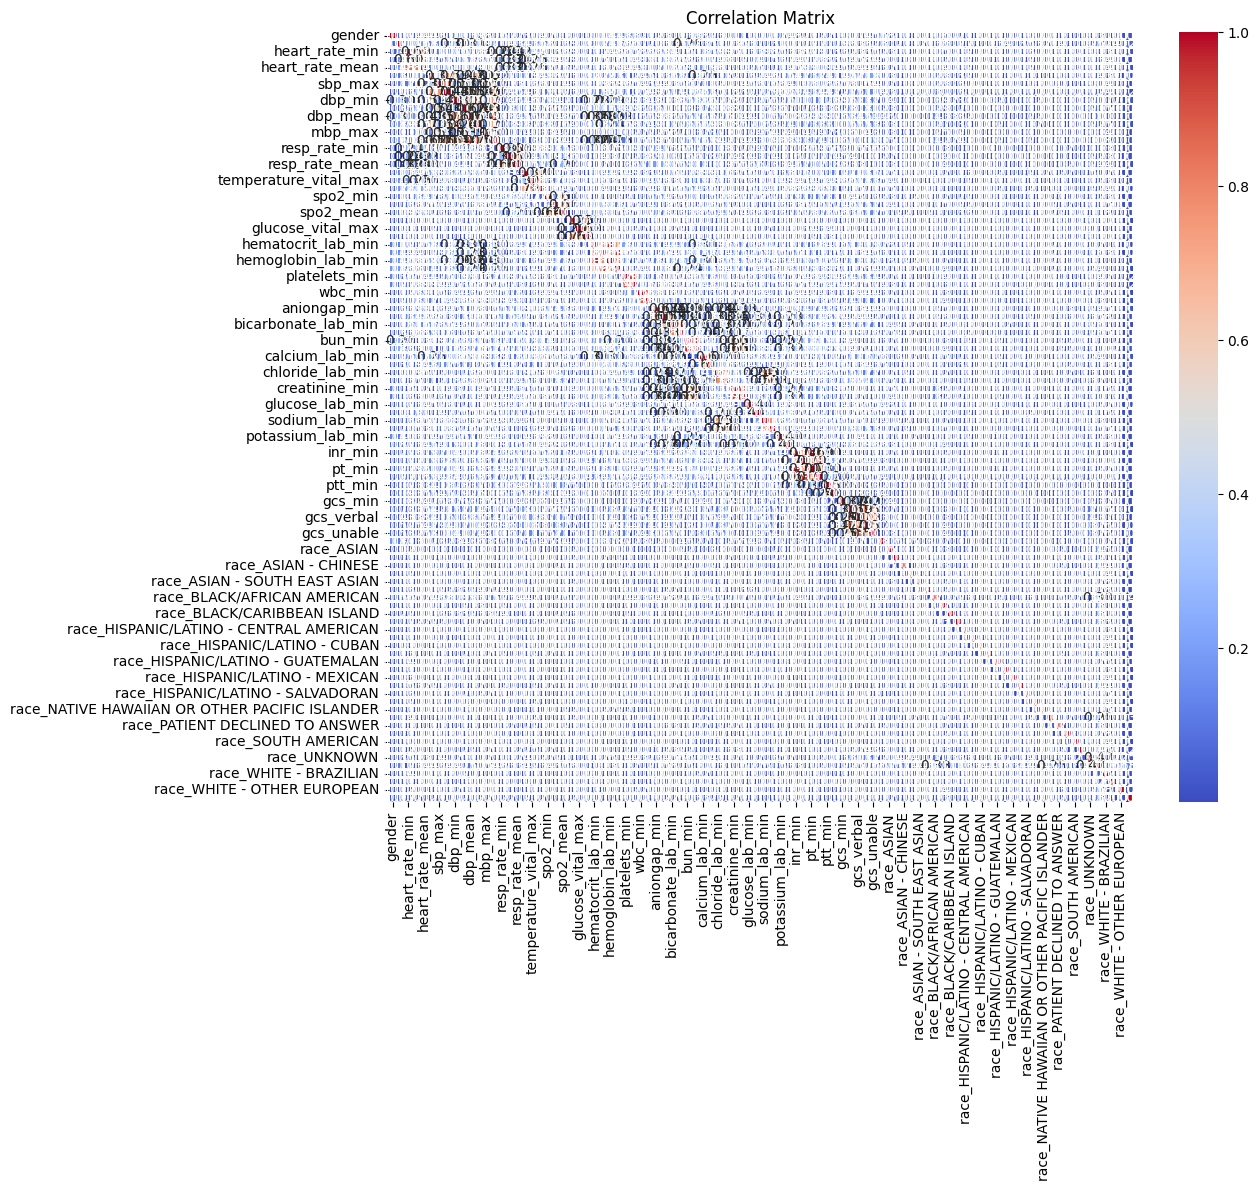

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X_imputed_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print("Dropping highly correlated features:", to_drop)

# Drop the identified features from the dataset
X_reduced = X_imputed_scaled.drop(columns=to_drop)

print(X_reduced.info())
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


Logistic Regression

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression with L1 penalty
logreg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=42)

logreg_l1.fit(X_train, y_train)
y_pred = logreg_l1.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

coefficients = logreg_l1.coef_
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients.flatten()})
coef_df = coef_df[coef_df['Coefficient'] != 0]  # Keep only non-zero coefficients

print("Selected features based on Lasso regression:")
print(coef_df)


Accuracy: 0.7320633673736581
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.42      0.51      5012
           1       0.76      0.89      0.82     10264

    accuracy                           0.73     15276
   macro avg       0.70      0.65      0.66     15276
weighted avg       0.72      0.73      0.71     15276

Selected features based on Lasso regression:
                          Feature  Coefficient
0                          gender     0.061003
1                   admission_age     0.389937
2                  heart_rate_min     0.140314
3                  heart_rate_max     0.158760
4                 heart_rate_mean    -0.169522
..                            ...          ...
83                     race_WHITE     0.059276
84         race_WHITE - BRAZILIAN    -0.003205
85  race_WHITE - EASTERN EUROPEAN     0.004557
86    race_WHITE - OTHER EUROPEAN     0.009819
87           race_WHITE - RUSSIAN     0.002958

[88 rows x

AUC Score: 0.7598008544108326


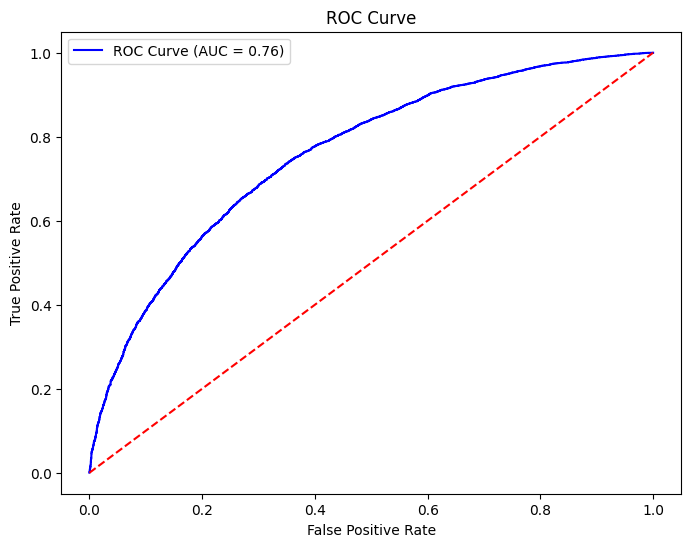

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for the positive class (assuming a binary classification)
y_prob = logreg_l1.predict_proba(X_test)[:, 1]  # Select probabilities for class 1

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Print AUC result
print("AUC Score:", auc_score)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)  # Compute FPR and TPR
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:

import statsmodels.api as sm

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert back to DataFrame and reset index to align with y_train
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


# FORWARD SELECTION
def forward_selection(X, y, significance_level=0.05):
    initial_features = []
    remaining_features = list(X.columns)
    best_features = []

    while remaining_features:
        scores = {}
        for feature in remaining_features:
            test_features = initial_features + [feature]
            X_train_subset = sm.add_constant(X[test_features])
            model = sm.Logit(y, X_train_subset).fit(disp=0)
            scores[feature] = model.pvalues[feature]

        best_feature = min(scores, key=scores.get)
        if scores[best_feature] < significance_level:
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_features.append(best_feature)
        else:
            break

    return best_features

selected_features_forward = forward_selection(X_train_scaled, y_train)
print("Selected Features (Forward Selection):", selected_features_forward)

# BACKWARD ELIMINATION
def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)

    while len(features) > 0:
        X_train_subset = sm.add_constant(X[features])
        model = sm.Logit(y, X_train_subset).fit(disp=0)
        p_values = model.pvalues.iloc[1:]

        worst_feature = p_values.idxmax()
        if p_values[worst_feature] > significance_level:
            features.remove(worst_feature)
        else:
            break

    return features

selected_features_backward = backward_elimination(X_train_scaled, y_train)
print("Selected Features (Backward Elimination):", selected_features_backward)

# TRAIN LOGISTIC REGRESSION WITH SELECTED FEATURES
# Using Forward Selection Features
X_train_forward = X_train_scaled[selected_features_forward]
X_test_forward = X_test_scaled[selected_features_forward]

logreg_forward = LogisticRegression(max_iter=1000)
logreg_forward.fit(X_train_forward, y_train)
y_pred_forward = logreg_forward.predict(X_test_forward)

print("Forward Selection Model Accuracy:", accuracy_score(y_test, y_pred_forward))

# Using Backward Elimination Features
X_train_backward = X_train_scaled[selected_features_backward]
X_test_backward = X_test_scaled[selected_features_backward]

logreg_backward = LogisticRegression(max_iter=1000)
logreg_backward.fit(X_train_backward, y_train)
y_pred_backward = logreg_backward.predict(X_test_backward)

print("Backward Elimination Model Accuracy:", accuracy_score(y_test, y_pred_backward))


Selected Features (Forward Selection): ['gcs_verbal', 'admission_age', 'weight_admit', 'sbp_min', 'creatinine_min', 'heart_rate_max', 'temperature_vital_max', 'ptt_max', 'glucose_vital_min', 'potassium_lab_max', 'spo2_max', 'resp_rate_max', 'sbp_max', 'chloride_lab_max', 'temperature_vital_mean', 'dbp_mean', 'potassium_lab_min', 'glucose_lab_min', 'bun_min', 'calcium_lab_min', 'calcium_lab_max', 'mbp_max', 'hematocrit_lab_min', 'hematocrit_lab_max', 'chloride_lab_min', 'gender_M', 'sbp_mean', 'gcs_min', 'bicarbonate_lab_max', 'bicarbonate_lab_min', 'wbc_min', 'race_WHITE', 'inr_min', 'gcs_motor', 'gcs_eyes', 'resp_rate_mean', 'resp_rate_min', 'spo2_mean', 'race_HISPANIC OR LATINO', 'aniongap_max', 'sodium_lab_max', 'heart_rate_min', 'heart_rate_mean', 'race_PORTUGUESE']
Selected Features (Backward Elimination): ['admission_age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean', 'sbp_min', 'sbp_max', 'sbp_mean', 'dbp_mean', 'mbp_max', 'resp_rate_min', 'resp_rate_max', 'resp_rate_me

In [ ]:
#Train LASSO Logistic Regression with Class Weights
lasso_log_reg = LogisticRegression(
    penalty='l1',
    solver='saga',
    C=1.0,
    max_iter=500,
    random_state=42,
    class_weight='balanced'
)
lasso_log_reg.fit(X_train, y_train)

y_pred = lasso_log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
selected_features = X_reduced.columns[lasso_log_reg.coef_[0] != 0]
print("Selected Features after LASSO:", selected_features.tolist())


Accuracy: 0.6897093479968578
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.71      0.60      3372
           1       0.82      0.68      0.75      6812

    accuracy                           0.69     10184
   macro avg       0.67      0.69      0.67     10184
weighted avg       0.72      0.69      0.70     10184

Selected Features after LASSO: ['admission_age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean', 'sbp_min', 'sbp_max', 'sbp_mean', 'dbp_min', 'dbp_max', 'dbp_mean', 'mbp_min', 'mbp_max', 'resp_rate_min', 'resp_rate_max', 'resp_rate_mean', 'temperature_vital_min', 'temperature_vital_max', 'temperature_vital_mean', 'spo2_min', 'spo2_max', 'spo2_mean', 'glucose_vital_min', 'glucose_vital_max', 'glucose_vital_mean', 'hematocrit_lab_min', 'hematocrit_lab_max', 'platelets_min', 'wbc_min', 'wbc_max', 'aniongap_min', 'aniongap_max', 'bicarbonate_lab_min', 'bicarbonate_lab_max', 'bun_min', 'calcium_lab_min', 'calci

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Random Forest

In [15]:
#random forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.4, random_state=42)

rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=None,  # Allow trees to grow fully
    min_samples_split=5,  # Minimum samples to split a node
    min_samples_leaf=2,  # Minimum samples in a leaf
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.36      0.48      6703
           1       0.75      0.92      0.82     13665

    accuracy                           0.74     20368
   macro avg       0.71      0.64      0.65     20368
weighted avg       0.73      0.74      0.71     20368

Confusion Matrix:
[[ 2443  4260]
 [ 1131 12534]]
Accuracy: 0.7353201099764336


Random Forest AUC Score: 0.7632630921084917


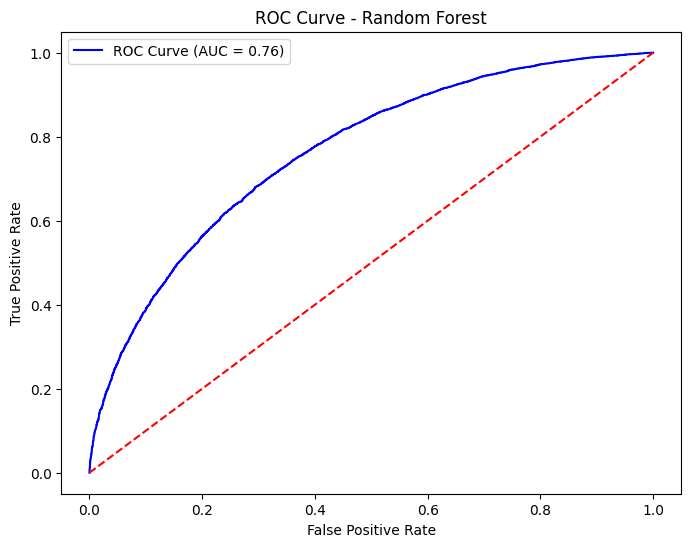

In [17]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_rf = roc_auc_score(y_test, y_prob_rf)

# Print AUC result
print("Random Forest AUC Score:", auc_score_rf)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

In [ ]:

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.40      0.50      6703
           1       0.75      0.90      0.82     13665

    accuracy                           0.73     20368
   macro avg       0.71      0.65      0.66     20368
weighted avg       0.72      0.73      0.71     20368

Confusion Matrix:
[[ 2690  4013]
 [ 1401 12264]]
Accuracy: 0.7341908876669285


XGBoost


Accuracy: 0.7436665357423409
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.45      0.54      6703
           1       0.77      0.89      0.82     13665

    accuracy                           0.74     20368
   macro avg       0.71      0.67      0.68     20368
weighted avg       0.73      0.74      0.73     20368


Feature Importance:
                        Feature  Importance
55                 weight_admit       304.0
1                 admission_age       213.0
5                       sbp_min       172.0
23            glucose_vital_max       172.0
17        temperature_vital_max       170.0
..                          ...         ...
57  race_BLACK/AFRICAN AMERICAN         5.0
58      race_HISPANIC OR LATINO         3.0
60                 race_UNKNOWN         3.0
56                   race_ASIAN         1.0
59                   race_OTHER         1.0

[62 rows x 2 columns]


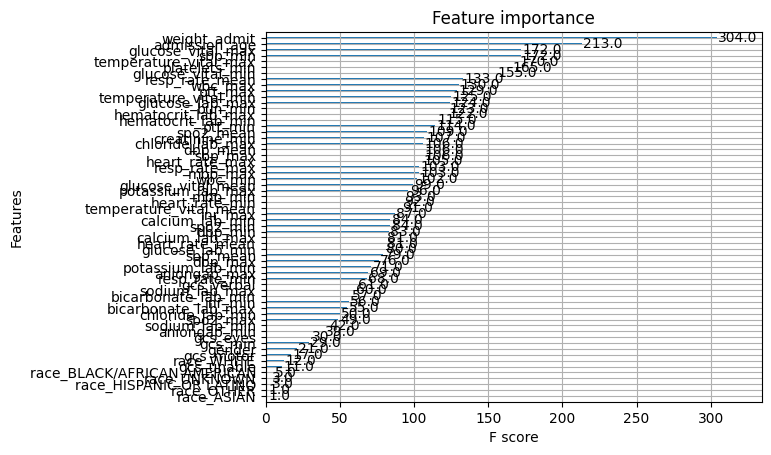

In [19]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up the parameters for XGBoost with L1 regularization
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'alpha': 1.0,
    'learning_rate': 0.1,
    'max_depth': 6,
    'random_state': 42
}

model = xgb.train(params, dtrain, num_boost_round=100)
y_pred = model.predict(dtest)
y_pred = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
importance = model.get_score(importance_type='weight')  # Get feature importance based on frequency
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)

# Feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()


XGBoost AUC Score: 0.7794608625581142


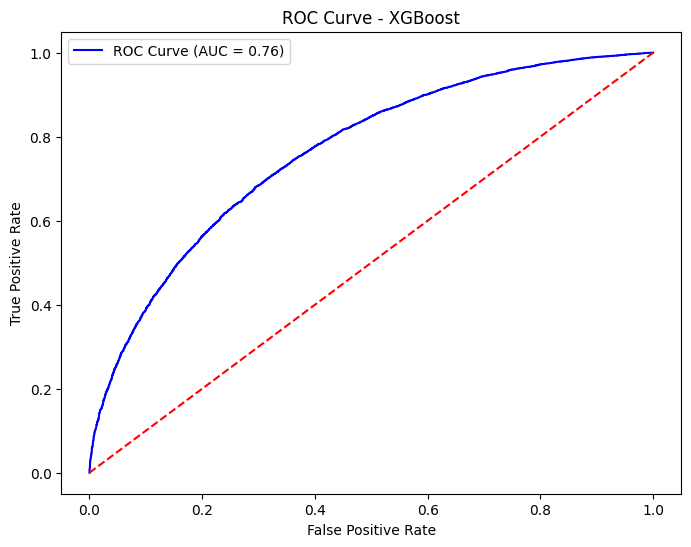

In [21]:
# Compute AUC score
auc_score_xgb = roc_auc_score(y_test, model.predict(dtest))
print("XGBoost AUC Score:", auc_score_xgb)

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

# Apply RFE for feature selection
rfe = RFE(estimator=xgb_model, n_features_to_select=15)  # Select top 15 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)


xgb_model.fit(X_train_rfe, y_train)
y_pred = xgb_model.predict(X_test_rfe)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)


Accuracy: 0.7299194815396701
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.45      0.52      6703
           1       0.76      0.87      0.81     13665

    accuracy                           0.73     20368
   macro avg       0.69      0.66      0.67     20368
weighted avg       0.72      0.73      0.72     20368

Selected features: Index(['admission_age', 'sbp_min', 'dbp_min', 'temperature_vital_max',
       'spo2_min', 'spo2_max', 'glucose_vital_max', 'bun_min',
       'creatinine_min', 'potassium_lab_max', 'inr_max', 'gcs_verbal',
       'gcs_eyes', 'gcs_unable', 'weight_admit'],
      dtype='object')


In [ ]:
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n", feature_importance_df)



Feature Importance:
                   Feature  Importance
11             gcs_verbal    0.197794
8          creatinine_min    0.074835
14           weight_admit    0.073769
7                 bun_min    0.070899
13             gcs_unable    0.063971
12               gcs_eyes    0.058780
0           admission_age    0.057661
1                 sbp_min    0.055598
6       glucose_vital_max    0.055008
10                inr_max    0.054109
4                spo2_min    0.052571
5                spo2_max    0.048531
3   temperature_vital_max    0.045847
9       potassium_lab_max    0.045752
2                 dbp_min    0.044874


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7],  
    'n_estimators': [100, 200],  
    'alpha': [0.1, 1, 10],  
    'subsample': [0.8, 1.0], 
    'colsample_bytree': [0.8, 1.0]  
}

# Initialize XGBClassifier (needed for GridSearch)
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)
y_pred = best_xgb.predict(X_test)


print("\nBest XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

importance = best_xgb.feature_importances_
features = X_train.columns  # Get feature names

importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (After Grid Search)")
plt.gca().invert_yaxis()
plt.show()



SVM

In [23]:
#SVM
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Train SVM Model with Default Parameters
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


SVM Accuracy: 0.7397879025923016
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.38      0.49      5012
           1       0.75      0.91      0.83     10264

    accuracy                           0.74     15276
   macro avg       0.72      0.65      0.66     15276
weighted avg       0.73      0.74      0.72     15276



In [24]:
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Apply RFE for feature selection (selecting top 15 features)
rfe = RFE(estimator=svm, n_features_to_select=15)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train SVM model on selected features
svm.fit(X_train_rfe, y_train)

y_pred = svm.predict(X_test_rfe)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [ ]:
from sklearn.inspection import permutation_importance

# Ensure SVC is fitted before calculating importance
svc_model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(svc_model, X_test, y_test, scoring="accuracy", n_repeats=10, random_state=42)

# Convert results to DataFrame
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': perm_importance.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Permutation Method):")
print(importance_df)
